# Big Data Mart Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context('notebook')
import matplotlib.pyplot as plt

In [2]:
# Load train and test data fiels
train = pd.read_csv('bigdatatrain.csv')
test = pd.read_csv('bigdatatest.csv')

In [3]:
print(train.shape)
train.head(3)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
print(test.shape)
test.head(3)

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [5]:
list(train.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [6]:
list(test.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Test data doesnt have the target varibale to train and evaluate the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [13]:
print(train.Item_Fat_Content.unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [14]:
print(train.Item_Type.unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [15]:
print(train.Outlet_Identifier.unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [16]:
print(train.Outlet_Size.unique())

['Medium' nan 'High' 'Small']


In [17]:
print(train.Outlet_Location_Type.unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [18]:
print(train.Outlet_Type.unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [19]:
data = train

In [20]:
# Taking the avearge weight of each product and filling the null values in Item_weight
item_averages = data.groupby('Item_Identifier')[['Item_Identifier','Item_Weight']].mean()
data.loc[data['Item_Weight'].isnull(),'Item_Weight'] = data.loc[data['Item_Weight'].isnull(),
                                                                'Item_Identifier'].apply(lambda x: item_averages.loc[x],)

In [21]:
data['Item_Weight'].isnull().sum()

4

Still there are products without any weights

In [22]:
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [23]:
# Taking the avearge of product weight from test data and fill the null valued products
item_averages_test = test.groupby('Item_Identifier')[['Item_Identifier','Item_Weight']].mean()
data.loc[data['Item_Weight'].isnull(),'Item_Weight'] = data.loc[data['Item_Weight'].isnull(),
                                                                'Item_Identifier'].apply(lambda x: item_averages_test.loc[x],)

In [24]:
data['Item_Weight'].isnull().sum()

0

In [25]:
# Cheking for unique outlet size in each outlet type
data.groupby('Outlet_Type')['Outlet_Size'].unique()

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

In [26]:
# Filling the null values with the mode of the outlet size corresponding to each outlet type
data[data['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].agg(pd.Series.mode)
data.loc[data['Outlet_Size'].isnull(),'Outlet_Size'] = 'Small'

In [27]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Null values are handled

In [28]:
# Rename the Item_fat_Content values
data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'},inplace=True)

In [30]:
# Checking for any duplicates
data.duplicated().sum()

0

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.873623,4.645893,4.555,8.785000,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In Item_visibility the minimum value is 0, which is not actually possible.

In [32]:
# Handling the 0 values in Item_Visibilty by taking the mean of visibiliy of each product
visibility_averages = data.groupby('Item_Identifier')[['Item_Identifier','Item_Visibility']].mean()
data.loc[(data['Item_Visibility'] == 0),'Item_Visibility'] = data.loc[(data['Item_Visibility'] == 0),
                                                                'Item_Identifier'].apply(lambda x: visibility_averages.loc[x],)

In [33]:
len(data[data['Item_Visibility'] == 0])

0

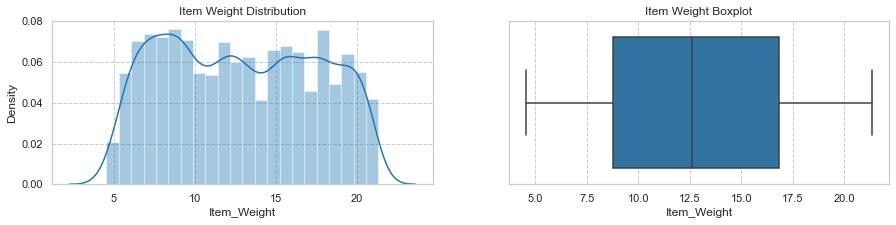

In [34]:
# Distribution of item weight of all the products
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(data['Item_Weight'])
plt.title('Item Weight Distribution')

plt.subplot(1,2,2)
sns.boxplot(data['Item_Weight'])
plt.title('Item Weight Boxplot')

plt.show()

There is no outliers in Item_weight

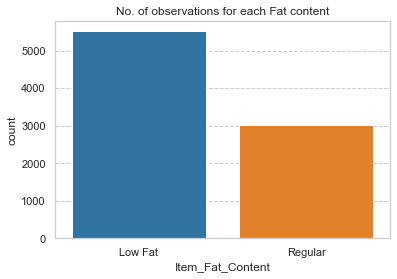

In [34]:
sns.countplot(data['Item_Fat_Content'])
plt.title('No. of observations for each Fat content')
plt.show()

There are more number of Low fat prosuct observations than the regular fat content products

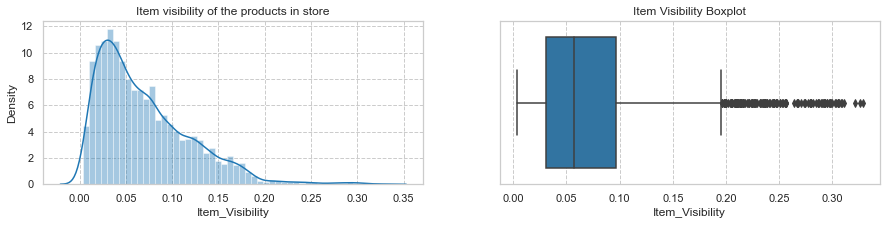

In [37]:
# Distribution of item visibiltiy of all the products

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(data['Item_Visibility'])
plt.title('Item visibility of the products in store')

plt.subplot(1,2,2)
sns.boxplot(data['Item_Visibility'])
plt.title('Item Visibility Boxplot')

plt.show()

Item_visibilty is skewed to the right and it has many outliers

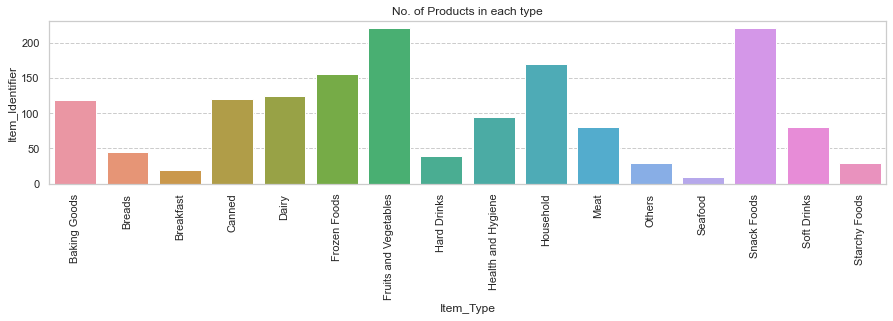

In [69]:
# Number of unique products in each type
plt.figure(figsize=(15,3))
dat = data.groupby('Item_Type',as_index=False)['Item_Identifier'].nunique()
ax = sns.barplot(data=dat,x='Item_Type',y='Item_Identifier')
ax.set_xticklabels(labels=data.groupby('Item_Type',as_index=False)['Item_Identifier'].nunique().Item_Type,rotation=90)
plt.title('No. of Products in each type')
plt.show()

Fruits and vegetables, Snack and HouseHold type consists of large number of products

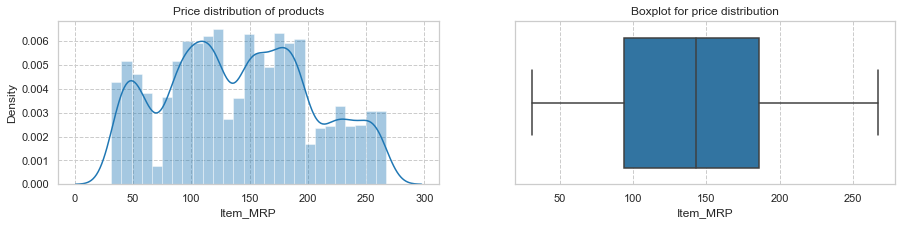

In [70]:
# Distribtuion of MRP
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(data['Item_MRP'])
plt.title('Price distribution of products')

plt.subplot(1,2,2)
sns.boxplot(data['Item_MRP'])
plt.title('Boxplot for price distribution')

plt.show()

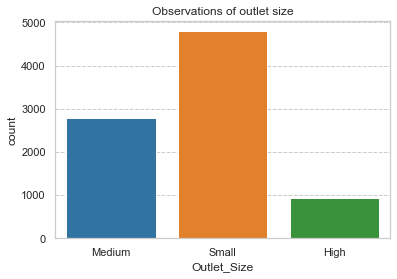

In [71]:
ax = sns.countplot(data['Outlet_Size'])
plt.title('Observations of outlet size')
plt.show()

Number of smaller outlets are higher than medium and high sized outlets

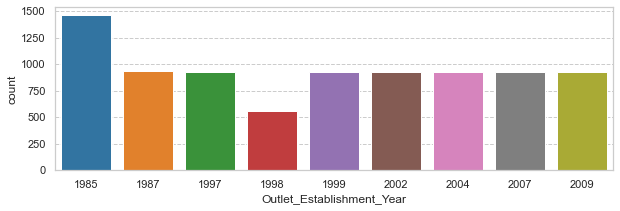

In [39]:
plt.figure(figsize=(10,3))
ax = sns.countplot(data['Outlet_Establishment_Year'])
plt.show()

In [40]:
data.groupby('Outlet_Establishment_Year')['Outlet_Size'].value_counts().to_frame()

Outlet_Size
Outlet_Establishment_Year Outlet_Size             
1985                      Medium               935
                          Small                528
1987                      High                 932
1997                      Small                930
1998                      Small                555
1999                      Medium               930
2002                      Small                929
2004                      Small                930
2007                      Small                926
2009                      Medium               928

1965 year has the highest number of outlets established.
In 1965, both medium and small sized outlets are established. 

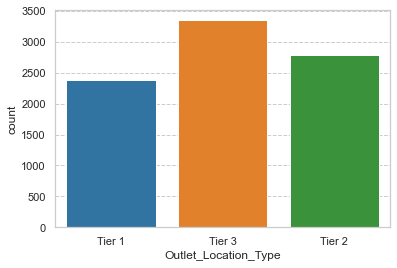

In [41]:
ax = sns.countplot(data['Outlet_Location_Type'])
plt.show()

In [42]:
data.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts().to_frame()

Outlet_Size
Outlet_Location_Type Outlet_Size             
Tier 1               Small               1458
                     Medium               930
Tier 2               Small               2785
Tier 3               Medium              1863
                     High                 932
                     Small                555

* There are more number of outlets in Tier3 location than other locations
* Tier 3 location has all the size of outlets

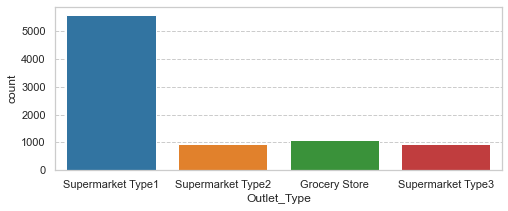

In [43]:
plt.figure(figsize=(8,3))
ax = sns.countplot(data['Outlet_Type'])
plt.show()

Number of type 1 supermarkets is more than 5 times the number of other individual outlets

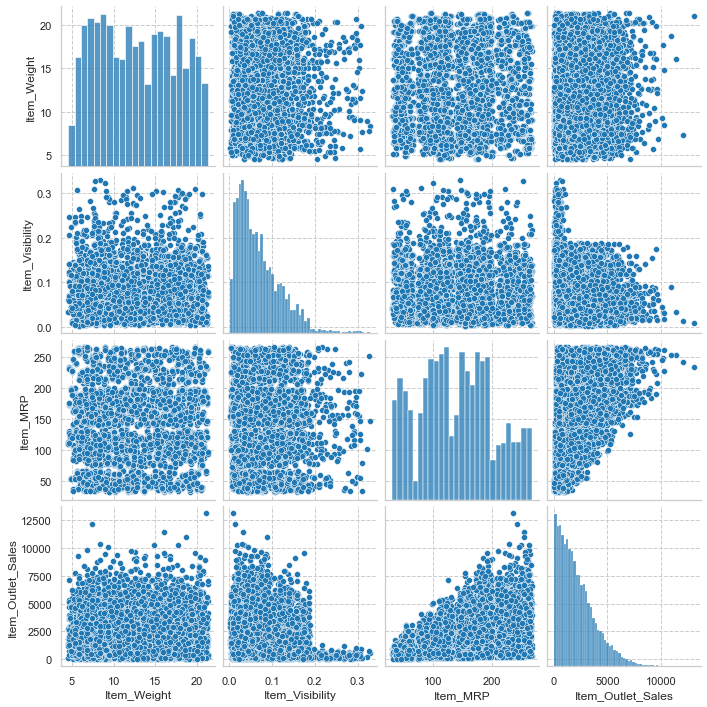

In [72]:
# plot paiplot for numeric variables
sns.pairplot(data.select_dtypes('float64'))
plt.show()

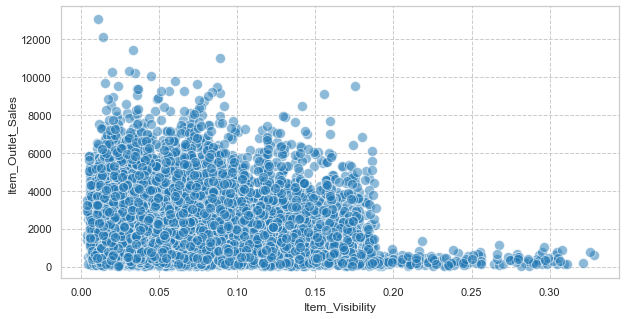

In [73]:
# Plot scattered plot for item_visiblity vs Sales
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Item_Visibility',y='Item_Outlet_Sales',alpha=0.5,s=100,edgecolor='w',linewidth=1)
plt.show()

In [75]:
print(data[data['Item_Visibility'] > 0.2]['Outlet_Size'].unique())
print(data[data['Item_Visibility'] > 0.2]['Outlet_Type'].unique())

['Small']
['Grocery Store']


From the scatter graph, we can see that the items with visibilty higher than 0.20 percentage have less number of sales.
This is because, the small sized outlets such as grocery stores have less space than the larger sized outlets, hence products have higher visibilty. Also the sales will be comparatively lower than the larger stores when considering size.

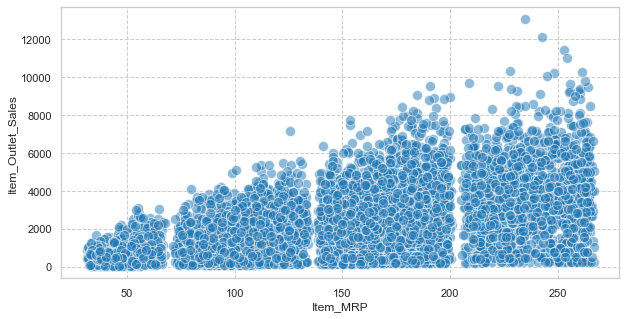

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Item_MRP',y='Item_Outlet_Sales',alpha=0.5,s=100,edgecolor='w',linewidth=1)
plt.show()

Sales are higher for products with higher prices

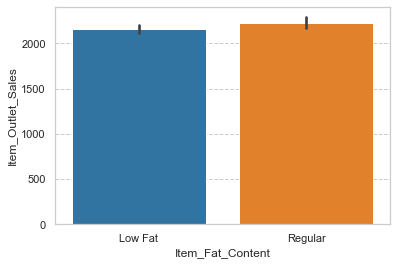

In [78]:
sns.barplot(data=data,x='Item_Fat_Content',y='Item_Outlet_Sales')
plt.show()

The sales are almost equal for both low fat and regual fat content products

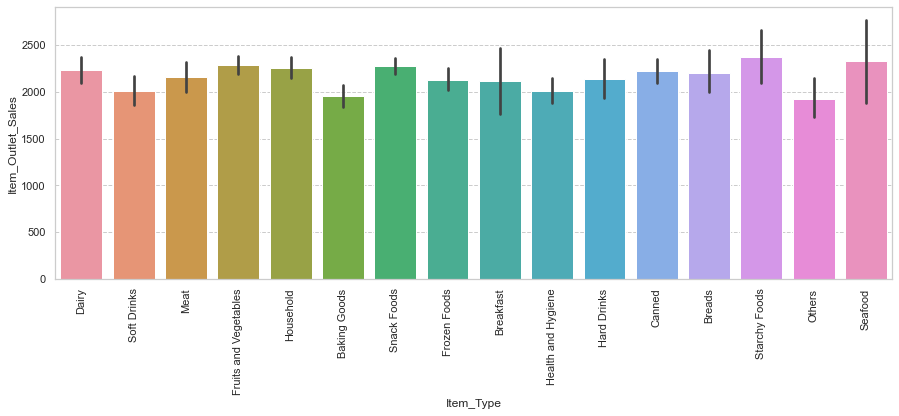

In [83]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=data,x='Item_Type',y='Item_Outlet_Sales')
ax.set_xticklabels(labels=data['Item_Type'].unique(),rotation=90)
plt.show()

* Seafoods has the highest number of sales
* Though the number of products is less for some product types (Seafood, soft drinks, breakfast, etc), it still has high number of sales

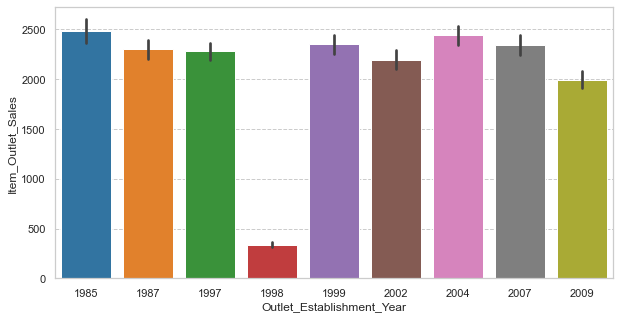

In [50]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=data,x='Outlet_Establishment_Year',y='Item_Outlet_Sales')
plt.show()

Outlets established in 1998 have the least number of sales

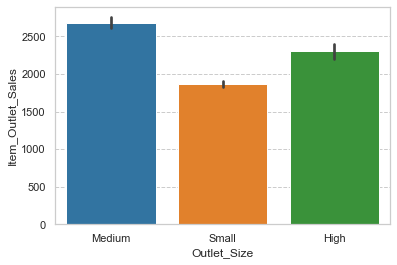

In [51]:
# plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Outlet_Size',y='Item_Outlet_Sales')
plt.show()

Medium sized oulets has the highest number of sales 

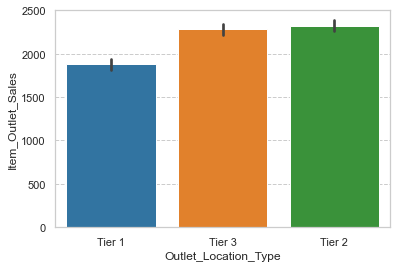

In [52]:
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales')
plt.show()

Tier 2 location has the highest number of item sales

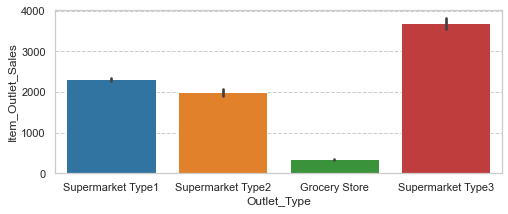

In [53]:
plt.figure(figsize=(8,3))
sns.barplot(data=data,x='Outlet_Type',y='Item_Outlet_Sales')
plt.show()

* Supermaket of type 3 has the highest number of sales
* Grocery store has the least number of sales

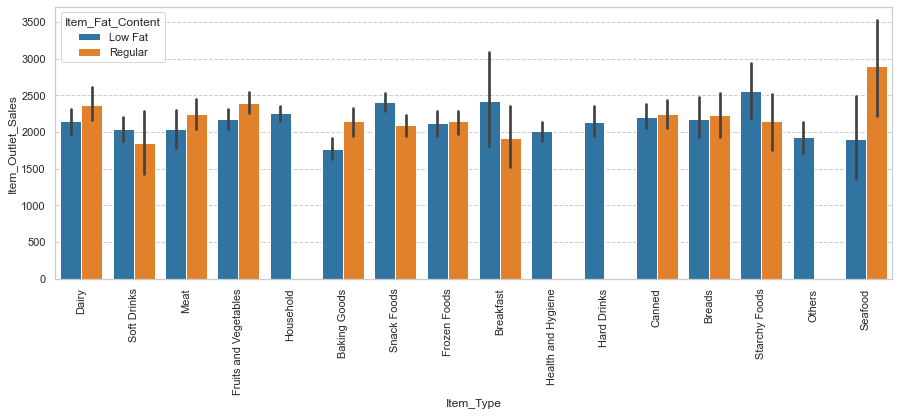

In [54]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=data,x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content')
ax.set_xticklabels(labels=data['Item_Type'].unique(),rotation=90)
plt.show()

* Low fat content products in the Starchy food, Breakfast and snack foods item types has the highest sales than the regular type products
* Here we can see item types like the household, others and health and hygiene coming under the low fat content, so we can asign these items in a new category as No fat  

In [85]:
data.loc[data['Item_Type'].isin(['Household','Health and Hygiene','Others']),'Item_Fat_Content'] = 'No Fat'
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'No Fat'], dtype=object)

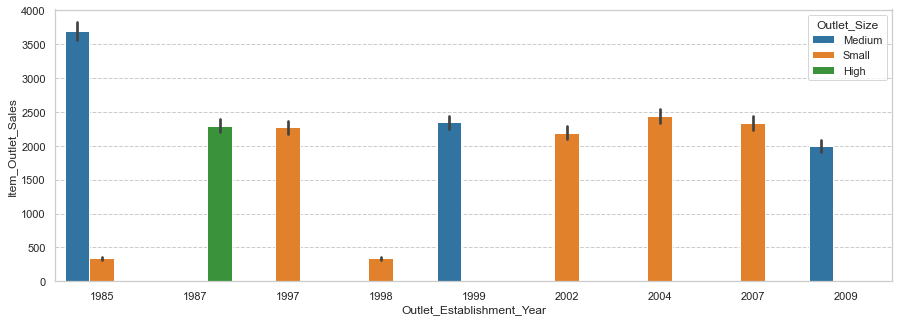

In [87]:
# Multivariate analysis on outlet size vs the outlet sales in each year
plt.figure(figsize=(15,5))
ax = sns.barplot(data=data,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size')
plt.show()

* Medium size outlets established in 1985 has the highest number of outlet sales
* Small sized outlets established in 1985 and 1998 has the least number of outlet sales

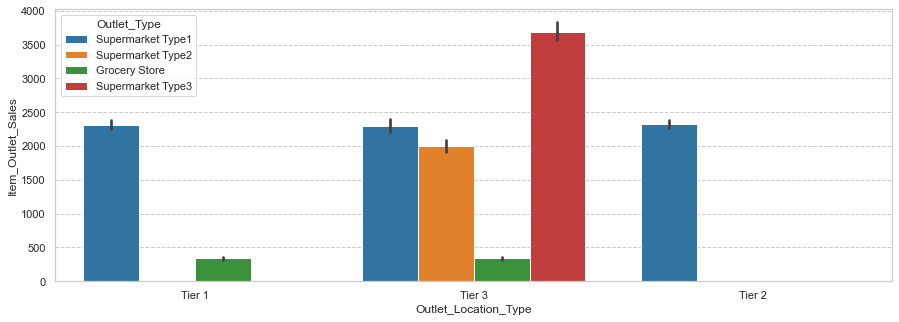

In [57]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type')
plt.show()

* Tier 3 location has all the types of outlets with high sales except for the groceries
* Tier 2 locaton has only sales from the type 1 supermarket

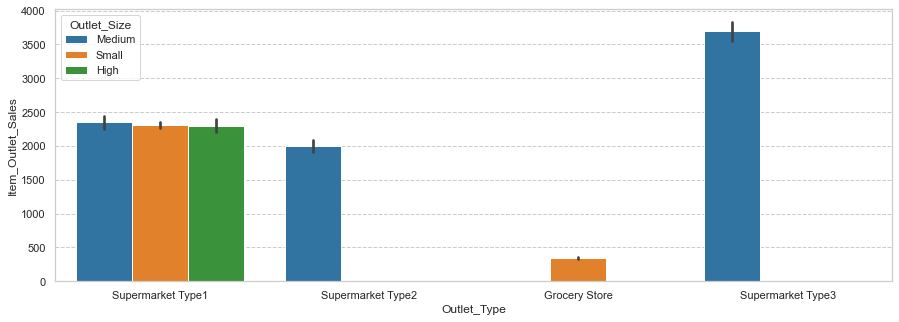

In [58]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=data,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size')
plt.show()

* Type one supermarkets of all size of outlets has almost equal number of sales
* There are high number of sales from the medium size outlets of type 3 supermarket

In [88]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,No Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature engineering

In [90]:
from sklearn.preprocessing import LabelEncoder

In [89]:
# Drop Item_Identifier and Outlet_Identifier
data.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [91]:
# Encode Item_Fat_Content attribute
le = LabelEncoder().fit_transform(data['Item_Fat_Content'])
data['Item_Fat_Content'] = le

In [92]:
# Group all the types of supermarkets into one group
data['Outlet_Type'].replace({'Supermarket Type1':0,'Supermarket Type2':0,'Supermarket Type3':0,'Grocery Store':1},inplace=True)

In [93]:
# Set Outlet_Establishment_Year as number of years from establishment and till 2013
data.Outlet_Establishment_Year = 2013 - data.Outlet_Establishment_Year

In [94]:
# One hot encode outlet size
outlet_size = pd.get_dummies(data['Outlet_Size'],prefix='Outlet_Size',drop_first=True)

In [95]:
# Drop the original columns after encoding
data.drop(columns=['Outlet_Size'],inplace=True)
data['Outlet_Size_Medium'] = outlet_size.Outlet_Size_Medium
data['Outlet_Size_Small'] = outlet_size.Outlet_Size_Small

In [96]:
# One hot encode outlet_location_type
outlet_location_type = pd.get_dummies(data['Outlet_Location_Type'],prefix='Outlet_Location_Type',drop_first=True)

In [97]:
# Drop the original columns after encoding
data.drop(columns=['Outlet_Location_Type'],inplace=True)
data['Outlet_Location_Type_Tier1'] = outlet_location_type['Outlet_Location_Type_Tier 2']
data['Outlet_Location_Type_Tier2'] = outlet_location_type['Outlet_Location_Type_Tier 3']

In [98]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [99]:
# Group the item types as Edible and Non edible types
data['Item_Type'].replace({
    'Dairy':'Edible',
    'Soft Drinks':'Edible',
    'Meat':'Edible',
    'Fruits and Vegetables':'Edible',
    'Household':'Non Edible',
    'Baking Goods':'Edible',
    'Snack Foods':'Edible',
    'Frozen Foods':'Edible',
    'Breakfast':'Edible',
    'Health and Hygiene':'Non Edible',
    'Hard Drinks':'Edible',
    'Canned':'Edible',
    'Breads':'Edible',
    'Starchy Foods':'Edible',
    'Others':'Non Edible',
    'Seafood':'Edible',
},inplace=True)

In [100]:
# Encode the Item_Type
le = LabelEncoder().fit_transform(data['Item_Type'])
data['Item_Type'] = le

In [101]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier1,Outlet_Location_Type_Tier2
0,9.30,0,0.016047,0,249.8092,14,0,3735.1380,1,0,0,0
1,5.92,2,0.019278,0,48.2692,4,0,443.4228,1,0,0,1
2,17.50,0,0.016760,0,141.6180,14,0,2097.2700,1,0,0,0
3,19.20,2,0.015274,0,182.0950,15,1,732.3800,0,1,0,1
4,8.93,1,0.008082,1,53.8614,26,0,994.7052,0,0,0,1


In [102]:
data.shape

(8523, 12)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Weight                 8523 non-null   float64
 1   Item_Fat_Content            8523 non-null   int32  
 2   Item_Visibility             8523 non-null   float64
 3   Item_Type                   8523 non-null   int32  
 4   Item_MRP                    8523 non-null   float64
 5   Outlet_Establishment_Year   8523 non-null   int64  
 6   Outlet_Type                 8523 non-null   int64  
 7   Item_Outlet_Sales           8523 non-null   float64
 8   Outlet_Size_Medium          8523 non-null   uint8  
 9   Outlet_Size_Small           8523 non-null   uint8  
 10  Outlet_Location_Type_Tier1  8523 non-null   uint8  
 11  Outlet_Location_Type_Tier2  8523 non-null   uint8  
dtypes: float64(4), int32(2), int64(2), uint8(4)
memory usage: 499.5 KB


In [104]:
ind = list(data.columns)
ind.remove('Item_Outlet_Sales')
x = data[ind]
y = data[['Item_Outlet_Sales']]

In [105]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

In [106]:
# Split data into train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.23,random_state=42)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6562, 11)
(1961, 11)
(6562, 1)
(1961, 1)


In [108]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
col_names = list(x_train.columns)

In [110]:
# Scale data
x_scaled = MinMaxScaler().fit_transform(x_train)
x_scaled_test = MinMaxScaler().fit_transform(x_test)

In [111]:
lr = sm.OLS(y_train,x_scaled).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              2848.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:41:30   Log-Likelihood:                         -55641.
No. Observations:                6562   AIC:                                  1.113e+05
Df Residuals:                    6551   BIC:                                  1.114e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

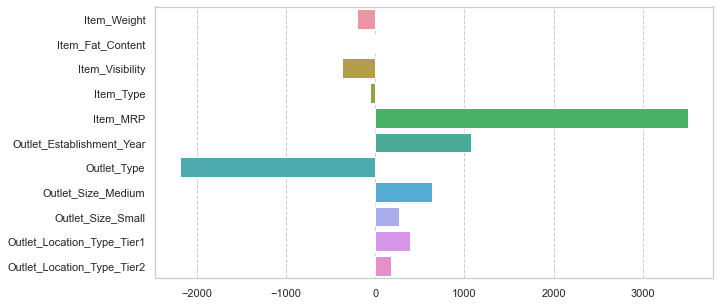

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(lr.params,col_names)
plt.show()

Item_Fat_Content has the least importance in the prediction, therefore we can remove it and retrain it.

In [125]:
# Drop 'Item_Fat_Content' and 'Item_Type' and scale data
x_scaled = MinMaxScaler().fit_transform(x_train.drop(['Item_Fat_Content','Item_Type'],axis=1))
x_scaled_test = MinMaxScaler().fit_transform(x_test.drop(['Item_Fat_Content','Item_Type'],axis=1))

In [115]:
lr = sm.OLS(y_train,x_scaled).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              3480.
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:46:54   Log-Likelihood:                         -55642.
No. Observations:                6562   AIC:                                  1.113e+05
Df Residuals:                    6553   BIC:                                  1.114e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

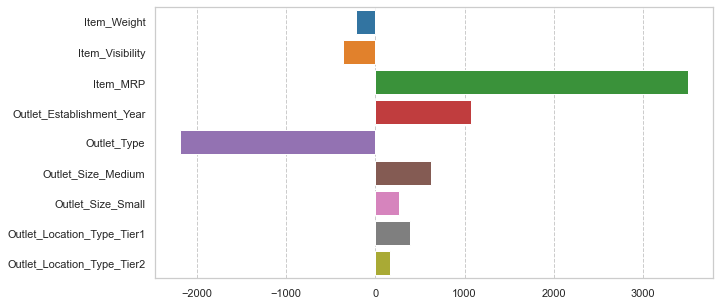

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(lr.params,x_train.drop(['Item_Fat_Content','Item_Type'],axis=1).columns)
plt.show()

In [117]:
# Predict test data
lr_pred = lr.predict(x_scaled_test)
print("R-Squared score:",r2_score(y_test,lr_pred))
print("mean absolute error:",mean_absolute_error(y_test,lr_pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,lr_pred)))

R-Squared score: 0.5446578106037654
mean absolute error: 827.3930702441395
Root mean squared error: 1115.0109598373972


In [129]:
from sklearn.linear_model import Lasso, Ridge

In [127]:
l_model = Lasso(alpha=0.1).fit(x_scaled,y_train)

In [131]:
# Predict test data
lr_pred = l_model.predict(x_scaled_test)
print("R-Squared score:",r2_score(y_test,lr_pred))
print("mean absolute error:",mean_absolute_error(y_test,lr_pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,lr_pred)))

R-Squared score: 0.5633793056848451
mean absolute error: 807.7573733697808
Root mean squared error: 1091.84841628336


In [140]:
r_model = Ridge(alpha=0.1).fit(x_scaled,y_train)

In [141]:
# Predict test data
lr_pred = r_model.predict(x_scaled_test)
print("R-Squared score:",r2_score(y_test,lr_pred))
print("mean absolute error:",mean_absolute_error(y_test,lr_pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,lr_pred)))

R-Squared score: 0.5633849442469107
mean absolute error: 807.7776429334875
Root mean squared error: 1091.841366142336


Both lasso and ridge regressor are equally performing.

In [142]:
import joblib
joblib.dump(r_model,'big_mart_sales_model.pkl')

['big_mart_sales_model.pkl']